<a href="https://colab.research.google.com/github/Ganga-dhar/Cat-and-Dog-Classification-uisng-VGG16/blob/main/Cat_Dog_Classification_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [2]:
pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 40kB/s 


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [5]:
import os
os.environ['KAGGLE_USERNAME'] = "mathyam" # username from the json file
os.environ['KAGGLE_KEY'] = "ac43c48d6cec800e4ff66f9e864fba08" # Provide your key from the json file
!kaggle competitions download -c dogs-vs-cats # api copied from kaggle

100% 271M/271M [00:02<00:00, 54.7MB/s]
100% 271M/271M [00:02<00:00, 106MB/s] 
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 88.5MB/s]
 97% 529M/543M [00:20<00:00, 58.1MB/s]
100% 543M/543M [00:20<00:00, 27.7MB/s]


In [6]:
# Upload data and extract the contents
from zipfile import ZipFile

file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')


done


In [7]:
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


In [8]:
original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_small1'
os.mkdir(base_dir) #make base directory

In [9]:
#Create directory paths

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)


test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)


test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [10]:
import shutil

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    

fnames = ['cat.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))


print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 8000
total training dog images: 8000
total test cat images: 2000
total test dog images: 2000


In [13]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/cats_and_dogs_small1/train'
valid_path = '/content/cats_and_dogs_small1/test'


In [16]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [18]:
vgg16.layers

In [17]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [19]:
  # useful for getting number of output classes
folders = glob('/content/cats_and_dogs_small1/train/*')

In [20]:
vgg16.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [21]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [22]:
x

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>

In [23]:
folders

['/content/cats_and_dogs_small1/train/cats',
 '/content/cats_and_dogs_small1/train/dogs']

In [24]:
len(folders)

2

In [25]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [26]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [27]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [28]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/cats_and_dogs_small1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 16000 images belonging to 2 classes.


In [30]:
test_set = test_datagen.flow_from_directory('/content/cats_and_dogs_small1/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4000 images belonging to 2 classes.


In [31]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
500/500 [==============================] - 237s 402ms/step - loss: 0.2785 - accuracy: 0.8827 - val_loss: 0.2275 - val_accuracy: 0.9080
Epoch 2/5
500/500 [==============================] - 200s 401ms/step - loss: 0.2240 - accuracy: 0.9128 - val_loss: 0.1193 - val_accuracy: 0.9548
Epoch 3/5
500/500 [==============================] - 202s 403ms/step - loss: 0.1861 - accuracy: 0.9269 - val_loss: 0.1317 - val_accuracy: 0.9463
Epoch 4/5
500/500 [==============================] - 200s 401ms/step - loss: 0.2175 - accuracy: 0.9230 - val_loss: 0.1900 - val_accuracy: 0.9342
Epoch 5/5
500/500 [==============================] - 200s 399ms/step - loss: 0.1831 - accuracy: 0.9325 - val_loss: 0.1331 - val_accuracy: 0.9492


In [32]:
import matplotlib.pyplot as plt

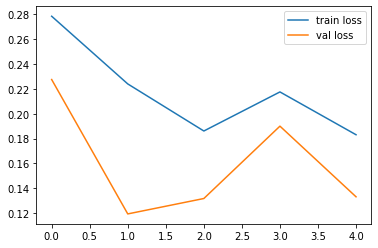

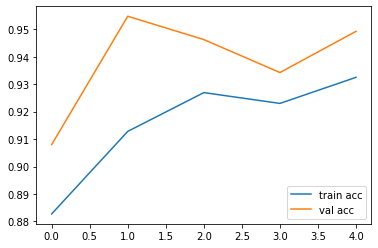

<Figure size 432x288 with 0 Axes>

In [33]:
# plot the loss

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [34]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
#Testing

EXAMPLE-1


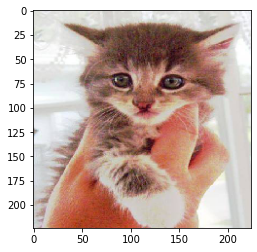

In [51]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/cats_and_dogs_small1/test/cats/cat.100.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [52]:
preds

array([[1.0000000e+00, 3.8364074e-14]], dtype=float32)

In [53]:
preds = np.argmax(preds, axis=1)

In [54]:
if preds==0:
  print("CAT")
else:
  print("DOG")

CAT


EXAMPLE-2

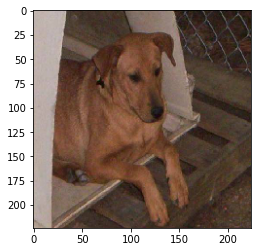

In [55]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/cats_and_dogs_small1/test/dogs/dog.100.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [56]:
preds

array([[0.01173751, 0.9882625 ]], dtype=float32)

In [57]:
preds = np.argmax(preds, axis=1)

In [58]:
if preds==0:
  print("CAT")
else:
  print("DOG")

DOG
